In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!unzip /content/gdrive/MyDrive/data/grays_images.zip

In [ ]:
import sys
import os
import glob
import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [ ]:
def plot_pie_chart_of_data(data, labels, colors, figName_with_ext, figureSize=(10,10), center_white_circle_radius=0.7):
    plt.figure(figsize=figureSize)
    my_circle=plt.Circle((0,0), center_white_circle_radius, color='white')
    plt.pie(data, labels= labels, colors= colors, autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    p.savefig(figName_with_ext, dpi=400, bbox_inches='tight')

Number of images in each directory=[8965, 8072, 7256, 7130, 7024] and total number of images=38447


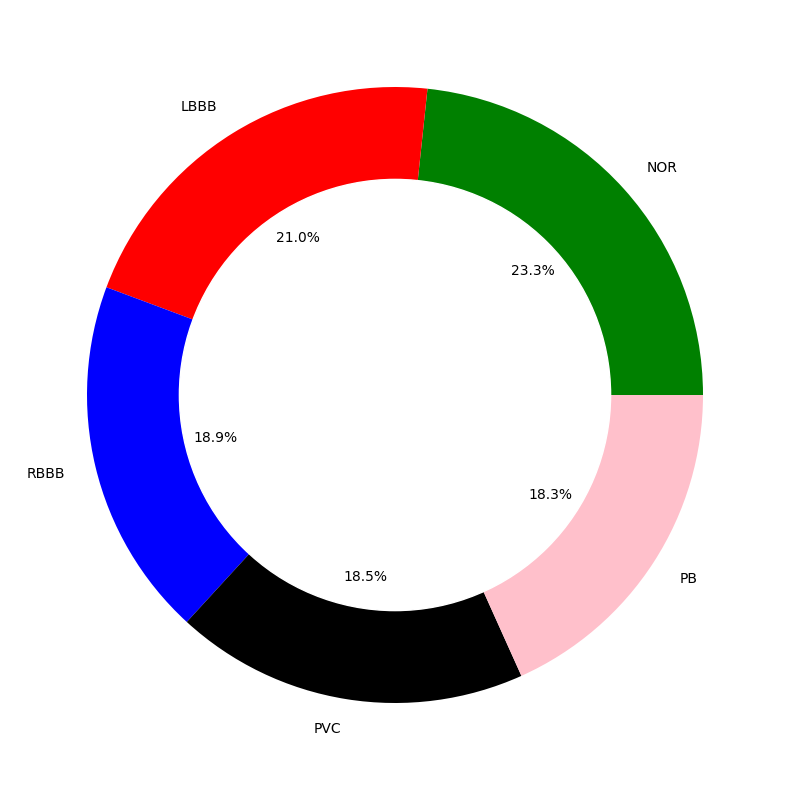

In [ ]:
Database_DIR = 'MIT-BIH_DATABASE/'
image_dirs = ['NOR/', 'LBBB/', 'RBBB/', 'PVC/', 'PB/']

no_of_files_in_dir=[]
for image_dir in image_dirs:
    path, dirs, files = next(os.walk(os.path.join(Database_DIR,image_dir)))
    no_of_files_in_dir.append(len(files)) 

print('Number of images in each directory={} and total number of images={}'.format(no_of_files_in_dir, sum(no_of_files_in_dir)))

labels = ['NOR', 'LBBB', 'RBBB', 'PVC', 'PB']
colors = ['green', 'red', 'blue', 'black', 'pink']

plot_pie_chart_of_data(no_of_files_in_dir,labels,colors, 'data_distribution.png')



In [ ]:
import glob
import random
import shutil

image_dirs = ['NOR', 'LBBB', 'RBBB', 'PVC', 'PB']

if os.path.isdir('MIT-BIH_DATABASE/train/NOR') is False:
    for i in image_dirs:
        current_path = 'MIT-BIH_DATABASE/'+i
        path_train = 'MIT-BIH_DATABASE/train/'+i
        path_test = 'MIT-BIH_DATABASE/test/'+i
        os.makedirs(path_train)
        os.makedirs(path_test)
        path, dirs, files = next(os.walk(current_path))
        no_of_files = len(files)
        no_of_test_dir_files = round(no_of_files*0.2)
        no_of_train_dir_files = no_of_files - no_of_test_dir_files
        print(no_of_files)
        for j in random.sample(glob.glob(current_path+'/fig*'),no_of_train_dir_files):
            shutil.move(j,path_train)
        for j in random.sample(glob.glob(current_path+'/fig*'),no_of_test_dir_files):
            shutil.move(j,path_test)
        


8965
8072
7256
7130
7024


Number of images in each directory=[7172, 6458, 5805, 5704, 5619] and total number of images=30758


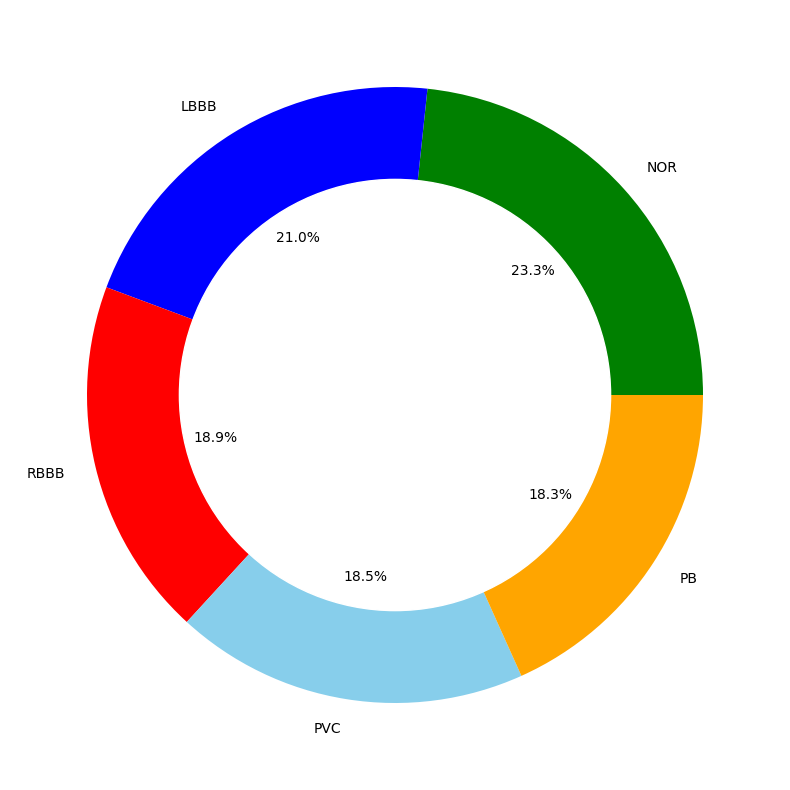

In [ ]:
Database_DIR = 'MIT-BIH_DATABASE/train/'
image_dirs = ['NOR/', 'LBBB/', 'RBBB/', 'PVC/', 'PB/']
no_of_files_in_dir=[]
for image_dir in image_dirs:
    path, dirs, files = next(os.walk(os.path.join(Database_DIR,image_dir)))
    no_of_files_in_dir.append(len(files)) 

print('Number of images in each directory={} and total number of images={}'.format(no_of_files_in_dir, sum(no_of_files_in_dir)))

labels = ['NOR', 'LBBB', 'RBBB', 'PVC', 'PB']
colors = ['green','blue','red','skyblue','orange']

plot_pie_chart_of_data(no_of_files_in_dir, labels, colors, 'data_distribution_train_dir.png')



Number of images in each directory=[1793, 1614, 1451, 1426, 1405] and total number of images=7689


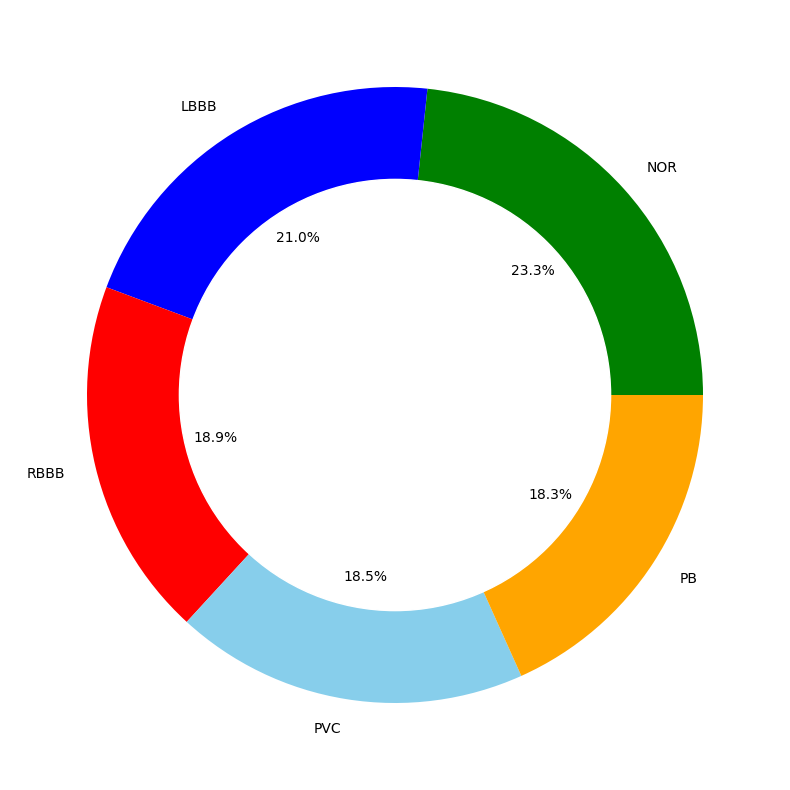

In [ ]:
# count the length of datas in test directory inside dataset
Database_DIR = 'MIT-BIH_DATABASE/test/'
image_dirs = ['NOR/', 'LBBB/', 'RBBB/', 'PVC/', 'PB/']
no_of_files_in_dir=[]
for image_dir in image_dirs:
    path, dirs, files = next(os.walk(os.path.join(Database_DIR,image_dir)))
    no_of_files_in_dir.append(len(files)) 

print('Number of images in each directory={} and total number of images={}'.format(no_of_files_in_dir, sum(no_of_files_in_dir)))

labels = ['NOR', 'LBBB', 'RBBB', 'PVC', 'PB']
colors = ['green','blue','red','skyblue','orange']

plot_pie_chart_of_data(no_of_files_in_dir, labels, colors, 'data_distribution_test_dir.png')

# no need to run this block anymore after data folder (train, test) creation

In [ ]:
# divide data images into train, test subdirectory
import glob
import random
import shutil

image_dirs = ['NOR', 'LBBB', 'RBBB', 'PVC', 'PB']

if os.path.isdir('MIT-BIH_DATABASE/valid/NOR') is False:
    for i in image_dirs:
        current_path = 'MIT-BIH_DATABASE/train/'+i
        path_valid = 'MIT-BIH_DATABASE/valid/'+i
        os.makedirs(path_valid)
        path, dirs, files = next(os.walk(current_path))
        no_of_files = len(files)
        no_of_valid_dir_files = round(no_of_files*0.2)
        print(no_of_files)
        for j in random.sample(glob.glob(current_path+'/fig*'),no_of_valid_dir_files):
            shutil.move(j,path_valid)
        
        
# moving 20% data from MIT-BIH_DATABASE/train/ directory to MIT-BIH_DATABASE/valid subdirectory 

# no need to run this block anymore after validation data folder (valid) creation

7172
6458
5805
5704
5619


In [ ]:
# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = "MIT-BIH_DATABASE/train"
valid_path = "MIT-BIH_DATABASE/valid"
test_path = "MIT-BIH_DATABASE/test"

In [ ]:
# dataset_size*epoch = number_of_iteration*batch_size

batchSize = 64

train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_batches = train_gen.flow_from_directory(directory=train_path, target_size=(64,64), classes=['NOR', 'LBBB', 'RBBB', 'PVC', 'PB'], batch_size=batchSize, seed=7)
valid_batches = train_gen.flow_from_directory(directory=valid_path, target_size=(64,64), classes=['NOR', 'LBBB', 'RBBB', 'PVC', 'PB'], batch_size=batchSize, seed=7)
test_batches = test_gen.flow_from_directory(directory=test_path, target_size=(64,64), classes=['NOR', 'LBBB', 'RBBB', 'PVC', 'PB'], batch_size=batchSize, seed=7, shuffle=False)

Found 24606 images belonging to 5 classes.
Found 6152 images belonging to 5 classes.
Found 7689 images belonging to 5 classes.


In [ ]:
def plotImages(images_arr, batchSize, subplot_dim=[1,10]):
    fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1], figsize=(20,20))
    axes = axes.flatten()  # flaten converts an array to a 1D vector
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

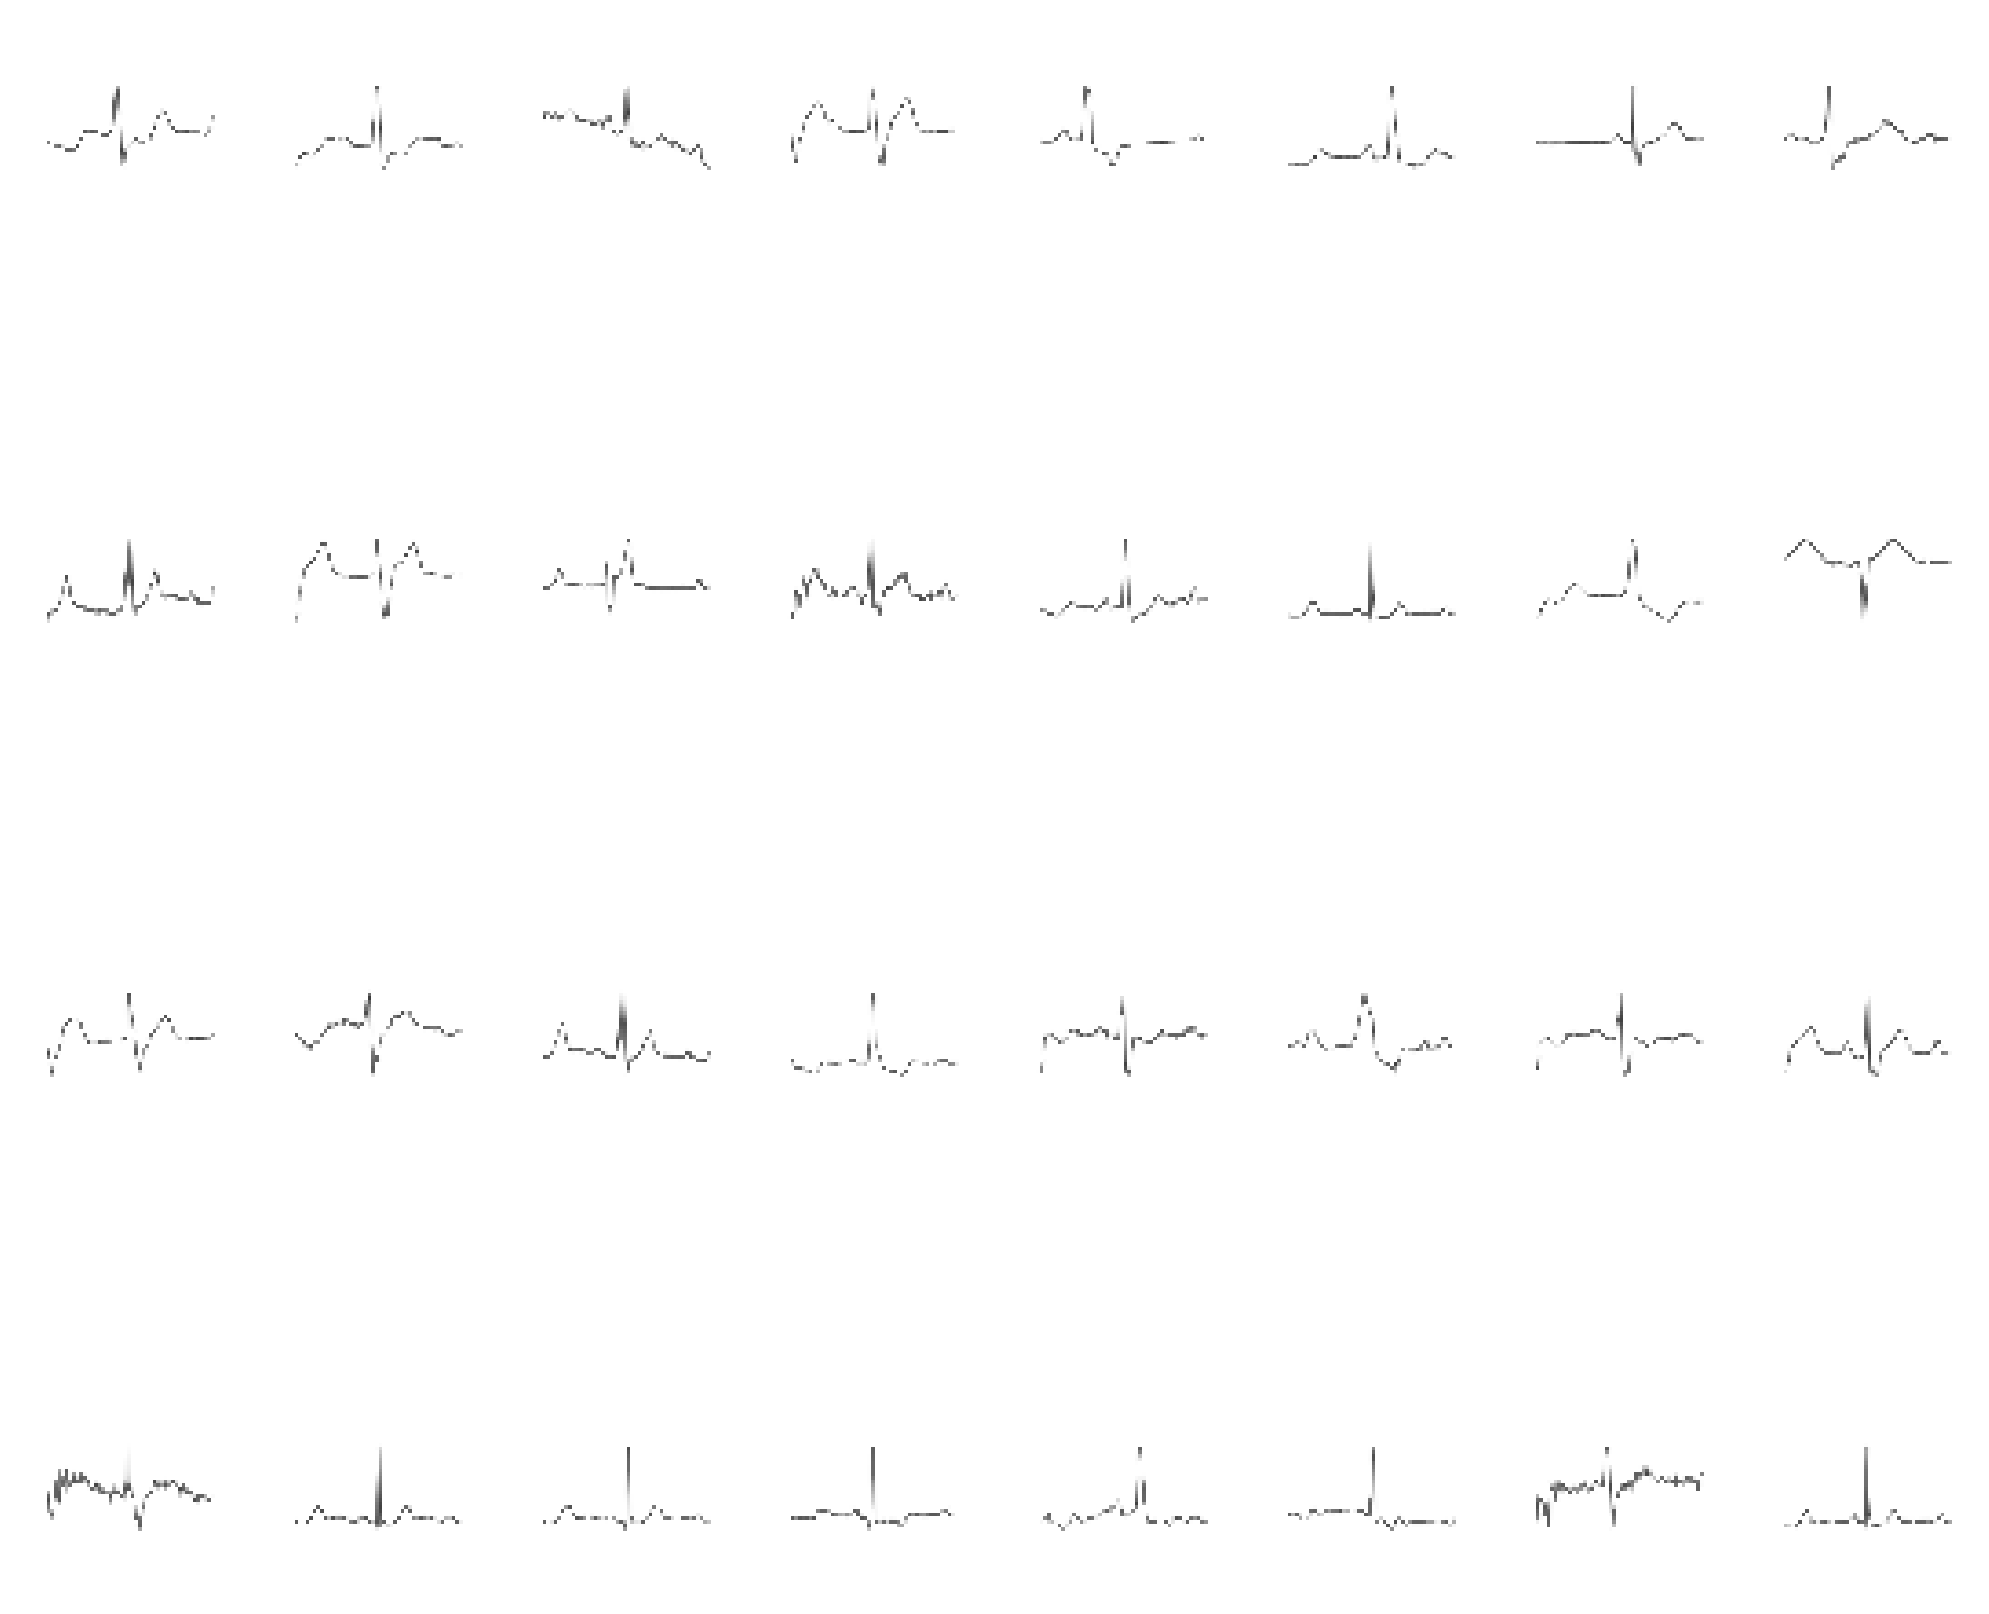

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0.

In [ ]:
# taking (train) images and labels of only one batch (32 images,32 labels) and plot them

imgs, labels = next(train_batches)
plotImages(imgs, batchSize, [4,8])
print(labels)

In [ ]:
# model

def proposed_model(input_h, input_w, nb_classes):
    InputShape = (input_h, input_w, 3)
    
    model = Sequential([
        Conv2D(20, kernel_size=(2,2), strides=(1,1), activation='relu',padding='same', input_shape=InputShape),
        MaxPool2D(pool_size=(2, 2), strides= 2),
        Conv2D(50, kernel_size=(2,2), strides=(1,1), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2, 2), strides= 2),
        Conv2D(100, kernel_size=(2,2), strides=(1,1), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2, 2), strides= 2),
        
        Flatten(),
        Dense(units=500, activation='relu'),
        Dense(units=nb_classes, activation='softmax'),
    ])
    
    return model

In [ ]:
import tensorflow as tf

# Define the input shape
input_shape = (64, 64, 1)

# Define the model architecture
model = tf.keras.models.Sequential([
    # Conv2D layer with kernel size of 2x2, 20 filters and stride of 1
    tf.keras.layers.Conv2D(20, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape),
    # MaxPooling2D layer with kernel size of 2x2 and stride of 2
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    # Conv2D layer with kernel size of 2x2, 50 filters and stride of 1
    tf.keras.layers.Conv2D(50, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
    # MaxPooling2D layer with kernel size of 2x2 and stride of 2
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    # Conv2D layer with kernel size of 2x2, 100 filters and stride of 1
    tf.keras.layers.Conv2D(100, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
    # MaxPooling2D layer with kernel size of 2x2 and stride of 2
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    # Flatten the output of the previous layer
    tf.keras.layers.Flatten(),
    # Fully connected layer with 500 units
    tf.keras.layers.Dense(500, activation='relu'),
    # Output layer with one unit (assuming a binary classification problem)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()


In [ ]:
model = proposed_model(64, 64, 5)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 20)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        4050      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 100)       20100     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 100)        0

In [ ]:
lr = 0.001
model.compile(optimizer=Adam(learning_rate= lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train model
Epoch = 150

model.fit(x=train_batches, validation_data=valid_batches, epochs=Epoch, shuffle=True)

# save model (architecture, optimizer, weights, ...all)
if os.path.isdir('models') is False:
    os.makedirs('models')
if os.path.isfile('models/ecg_arrhythmia_detection_model.h5') is False:
    model.save('models/ecg_arrhythmia_detection_model.h5')
    print('model saved successfully.')

Epoch 1/150
385/385 [==============================] - 25s 41ms/step - loss: 0.6139 - accuracy: 0.7674 - val_loss: 0.1553 - val_accuracy: 0.9533
Epoch 2/150
385/385 [==============================] - 15s 39ms/step - loss: 0.1173 - accuracy: 0.9660 - val_loss: 0.1053 - val_accuracy: 0.9738
Epoch 3/150
385/385 [==============================] - 18s 47ms/step - loss: 0.0756 - accuracy: 0.9769 - val_loss: 0.0784 - val_accuracy: 0.9779
Epoch 4/150
385/385 [==============================] - 15s 40ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0633 - val_accuracy: 0.9820
Epoch 5/150
385/385 [==============================] - 15s 38ms/step - loss: 0.0410 - accuracy: 0.9863 - val_loss: 0.0586 - val_accuracy: 0.9821
Epoch 6/150
385/385 [==============================] - 16s 41ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0527 - val_accuracy: 0.9836
Epoch 7/150
385/385 [==============================] - 15s 39ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0543 - val_ac

In [ ]:
# load model
from tensorflow.keras.models import load_model

model = load_model('models/ecg_arrhythmia_detection_model.h5')


print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 20)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        4050      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 100)       20100     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 100)        0

In [ ]:
model.history.history

AttributeError: ignored

In [ ]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys([])


KeyError: ignored

In [ ]:
predictions = model.predict(x = test_batches, verbose=1)


121/121 [==============================] - 4s 31ms/step


In [ ]:
# evaluate test results
results = model.evaluate(x = test_batches, verbose=1)

121/121 [==============================] - 4s 34ms/step - loss: 0.2550 - accuracy: 0.9886


In [ ]:
results

[0.25502538681030273, 0.9885550737380981]

In [ ]:
test_labels = test_batches.classes
print(test_labels)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
# confusion matrix plot function
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix_custom(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """ prints and plots confusion matrix. 
        normalization can be applied by setting `normalize=True` """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization ')
    
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion.jpg', dpi=400, pad_inches=0.1)

Normalized confusion matrix
[[0.98215282 0.00390407 0.00334635 0.00948132 0.00111545]
 [0.00185874 0.99318463 0.         0.00371747 0.00123916]
 [0.0034459  0.0034459  0.9896623  0.00137836 0.00206754]
 [0.00350631 0.00631136 0.00280505 0.98527349 0.00210379]
 [0.         0.00142349 0.00142349 0.00355872 0.99359431]]


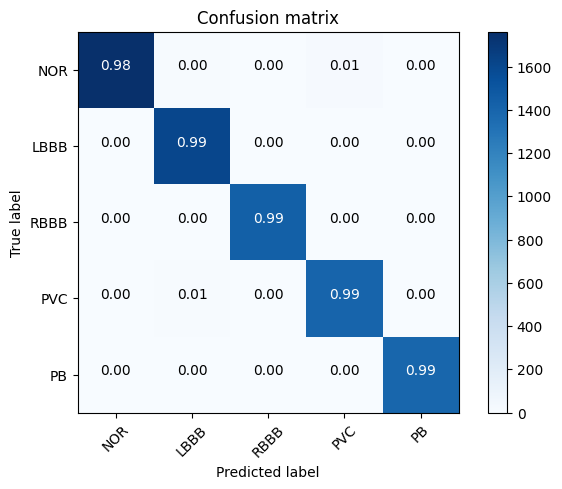

In [ ]:
# confusion matrix output
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)
cm_plot_lables = ['NOR', 'LBBB', 'RBBB', 'PVC', 'PB']
# non normalized confusion matrix
#plot_confusion_matrix_custom(cm = cm, classes = cm_plot_lables)

# normalized confusion matrix
plot_confusion_matrix_custom(cm = cm, classes = cm_plot_lables, normalize = True)

In [ ]:
# classification report
from sklearn.metrics import classification_report

classification_report_result = classification_report(test_labels, rounded_predictions, target_names=cm_plot_lables)
print(classification_report_result)

              precision    recall  f1-score   support

         NOR       0.99      0.98      0.99      1793
        LBBB       0.99      0.99      0.99      1614
        RBBB       0.99      0.99      0.99      1451
         PVC       0.98      0.99      0.98      1426
          PB       0.99      0.99      0.99      1405

    accuracy                           0.99      7689
   macro avg       0.99      0.99      0.99      7689
weighted avg       0.99      0.99      0.99      7689



In [ ]:
!unzip /content/test_img.zip

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('models/ecg_arrhythmia_detection_model.h5')

In [ ]:
img = image.load_img("/content/LONG_DATABASE/PVC/fig_046_100.png",target_size=(64,64))

In [ ]:
x=image.img_to_array(img)

In [ ]:
import numpy as np

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 194ms/step


In [ ]:
y_pred=np.argmax(pred)

In [ ]:
y_pred

3